In [130]:
# !pip install textblob
# !pip install tweepy

import numpy as np
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
from time import perf_counter

import textblob
import tweepy
import nltk
# nltk.download("opinion_lexicon")
from nltk.corpus import opinion_lexicon

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score

from xgboost.sklearn import XGBClassifier

In [131]:
tweets = pd.read_csv(r"Sentiment Analysis Dataset.csv")
tweets = tweets[["SentimentText", "Sentiment"]][:100000]
tweets

,SentimentText,Sentiment
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0
...,...,...
99995,@Cupcake1012 You're welcome~ The Gokey Gang wi...,1
99996,"@cupcake79 i'm just coming straight home, and ...",0
99997,@cupcake79 Should but won't. I'm such a masoc...,0
99998,@cupcakebrii good luck. i wanted to apply at b...,0


In [132]:
np.sum(tweets["Sentiment"])/tweets.shape[0]

0.56461

In [133]:
lemma = WordNetLemmatizer()
stp_wds = set(stopwords.words("english")+list(punctuation))

# stp_wds_pos = stp_wds.union(set(opinion_lexicon.positive()))
# stp_wds_neg = stp_wds.union(set(opinion_lexicon.negative()))
stp_wds

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [8]:
all_text = " ".join(list(tweets["SentimentText"]))
pos_text = " ".join(list(tweets.loc[tweets["Sentiment"] == 1, ["SentimentText"]]["SentimentText"]))
neg_text = " ".join(list(tweets.loc[tweets["Sentiment"] == 0, ["SentimentText"]]["SentimentText"]))

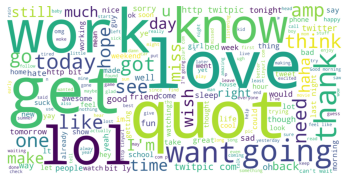

In [30]:
wd = wordcloud.WordCloud(stopwords = stp_wds, background_color = "white", width = 4000, height = 2000).generate(all_text)

plt.imshow(wd)
plt.axis("off")
plt.show()

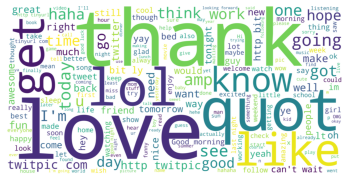

In [46]:
wd = wordcloud.WordCloud(stopwords = stp_wds, background_color = "white", width = 4000, height = 2000).generate(pos_text)

plt.imshow(wd)
plt.axis("off")
plt.show()

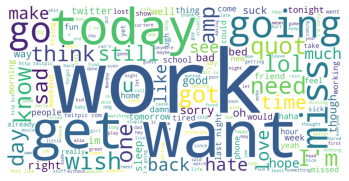

In [47]:
wd = wordcloud.WordCloud(stopwords = stp_wds, background_color = "white", width = 4000, height = 2000).generate(neg_text)

plt.imshow(wd)
plt.axis("off")
plt.show()

## Text Cleaning

In [134]:
def get_lem(text):
    text = text.lower()
    words = word_tokenize(text)
    words_stop = []
    for word in words:
        if word in stp_wds: continue
        words_stop.append(word)
    return [lemma.lemmatize(word) for word in words_stop]

def pos_neg(lemm_list):
    pos_words = []
    neg_words = []
    for word in lemm_list:
        if word in opinion_lexicon.negative(): neg_words.append(word)
        if word in opinion_lexicon.positive(): pos_words.append(word)
    return (pos_words, neg_words)

## Formula based method

In [161]:
t_f_start = perf_counter()

senti_pred = []
for i in list(tweets["SentimentText"]):

    this = pos_neg(get_lem(i))
    no_pos, no_neg = len(this[0]), len(this[1])
    if no_pos + no_neg > 0: 
        if((no_pos - no_neg)/(no_pos + no_neg)) >= 0: senti_pred.append(1)
        else: senti_pred.append(0)
    else: 
        senti_pred.append(1)


t_f_stop = perf_counter()
print("Elapsed time during the whole program in seconds:", t_f_stop-t_f_start)

Elapsed time during the whole program in seconds: 15504.6630095


In [162]:
roc_auc_score(tweets["Sentiment"],senti_pred), accuracy_score(tweets["Sentiment"],senti_pred)

(0.6175631822928198, 0.65303)

In [24]:
temp = get_lem(all_text)
len(temp)

13321823

In [9]:
temp = get_lem(all_text)
len(temp)

429955

In [10]:
tweets[["SentimentText"]]

,SentimentText
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7:30 :O
3,.. Omgaga. Im sooo im gunna CRy. I'...
4,i think mi bf is cheating on me!!! ...
...,...
49995,@ashsimpsonwentz this confused me 4 a min... h...
49996,@ashsimpsonwentz: oh so cute! Thank you for sh...
49997,@ashsnl2005 they are giving away red velvet ag...
49998,@AshSoPrecious Where were u @? Didn't know u w...


In [140]:
tweets_train, tweets_val = train_test_split(tweets,test_size = 0.2,random_state = 123)

In [141]:
tfidf = TfidfVectorizer(analyzer = get_lem, min_df = 0.00005, max_df = 0.95)

In [142]:
countv = CountVectorizer(analyzer = get_lem, min_df = 0.00005, max_df = 0.95)

In [143]:
tweets_train.shape[0], min_df_c, max_df_c

(80000, 200, 39800)

In [144]:
t_countv_start = perf_counter()

countv.fit(tweets_train["SentimentText"])
tweets_train_countv = countv.transform(tweets_train["SentimentText"])
tweets_val_countv = countv.transform(tweets_val["SentimentText"])

t_countv_stop = perf_counter()
print("Elapsed time for XGB training in seconds", t_countv_stop-t_countv_start)

Elapsed time for XGB training in seconds 46.77984169999945


In [145]:
len(countv.vocabulary_)

12448

In [146]:
np.sum(list(countv.vocabulary_.values()))

77470128

## Naive-Bayes

In [147]:
mnb = MultinomialNB()

In [148]:
t_nb_start = perf_counter()

mnb.fit(tweets_train_countv, tweets_train["Sentiment"])

t_nb_stop = perf_counter()
print("Elapsed time for Naive Bayes training in seconds:", t_nb_stop-t_nb_start)

Elapsed time for Naive Bayes training in seconds: 0.014804300000832882


In [149]:
t_nb_start = perf_counter()

mnb_pred = mnb.predict(tweets_val_countv)

t_nb_stop = perf_counter()
print("Elapsed time for Naive Bayes predictions in seconds:", t_nb_stop-t_nb_start)

Elapsed time for Naive Bayes predictions in seconds: 0.0025824000003922265


In [150]:
roc_auc_score(tweets_val["Sentiment"], mnb_pred), accuracy_score(tweets_val["Sentiment"], mnb_pred)

(0.7423026872275359, 0.7476)

## SVM

In [151]:
suppor_vect = SVC()

In [152]:
t_svm_start = perf_counter()

suppor_vect.fit(tweets_train_countv, tweets_train["Sentiment"])

t_svm_stop = perf_counter()
print("Elapsed time for SVM training in seconds:", t_svm_stop-t_svm_start)

Elapsed time for SVM training in seconds: 1234.2377228999994


In [153]:
t_svm_start = perf_counter()

suppor_vect_pred = suppor_vect.predict(tweets_val_countv)

t_svm_stop = perf_counter()
print("Elapsed time for SVM predictions in seconds:", t_svm_stop-t_svm_start)

Elapsed time for SVM predictions in seconds: 103.31341299999985


In [154]:
roc_auc_score(tweets_val["Sentiment"], suppor_vect_pred)

0.7392185568351877

## XGBoost

In [155]:
xgb = XGBClassifier()

In [156]:
t_xgb_start = perf_counter()

xgb.fit(tweets_train_countv, tweets_train["Sentiment"])

t_xgb_stop = perf_counter()
print("Elapsed time for XGB training in seconds", t_xgb_stop-t_xgb_start)

C:\Users\iamen\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Elapsed time for XGB training in seconds 3.4995104000008723


In [157]:
t_svm_stop = perf_counter()

print("Elapsed time during the whole program in seconds:", t_svm_stop-t_svm_start)

Elapsed time during the whole program in seconds: 106.873963


In [158]:
t_xgb_start = perf_counter()

xgb_pred = xgb.predict(tweets_val_countv)

t_xgb_stop = perf_counter()
print("Elapsed time for XGB training in seconds", t_xgb_stop-t_xgb_start)

Elapsed time for XGB training in seconds 0.0930638000008912


In [159]:
roc_auc_score(tweets_val["Sentiment"], xgb_pred), accuracy_score(tweets_val["Sentiment"], xgb_pred)

(0.7052073166764267, 0.72525)

In [160]:
tfidf.fit(tweets_train["SentimentText"])
tweets_train_tfidf = tfidf.transform(tweets_train["SentimentText"])
tweets_val_tfidf = tfidf.transform(tweets_val["SentimentText"])